# Bedmap Point Data
**Description:**  Individual data from Bedmap 1 for Antarctica.

**Dataset:** 

N.A.

**Associated paper:** 

Lythe, Matthew B., and David G. Vaughan. “BEDMAP: A New Ice Thickness and Subglacial Topographic Model of Antarctica.” Journal of Geophysical Research: Solid Earth 106, no. B6 (2001): 11335–51. https://doi.org/10.1029/2000JB900449.

In [5]:
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
version_names = [
    "bedmap1",
    # "bedmap2",
    # "bedmap3",
]

dfs = []
for name in version_names:
    df = fetch.bedmap_points(
        version=name,
        # available options
        # region,
    )
    print(df.head())
    dfs.append(df)

   trajectory_id  longitude (degree_east)  latitude (degree_north)  \
0              1                    4.449                  -75.623   
1              2                    4.438                  -75.621   
2              3                    4.425                  -75.619   
3              4                    4.420                  -75.619   
4              5                    4.407                  -75.617   

   surface_altitude (m)  land_ice_thickness (m)  bedrock_altitude (m)  \
0                   NaN                  2650.0                   NaN   
1                   NaN                  2628.0                   NaN   
2                   NaN                  2620.0                   NaN   
3                   NaN                  2635.0                   NaN   
4                   NaN                  2646.0                   NaN   

               x             y  
0  121788.567945  1.565282e+06  
1  121505.125021  1.565526e+06  
2  121166.937514  1.565773e+06  
3  12103

In [3]:
data_to_plot = [
    # bedmap1
    [
        "surface_altitude (m)",
        "land_ice_thickness (m)",
        "bedrock_altitude (m)",
    ],
    # # bedmap2
    # [
    # ],
    # # bedmap3
    # [
    # ],
]

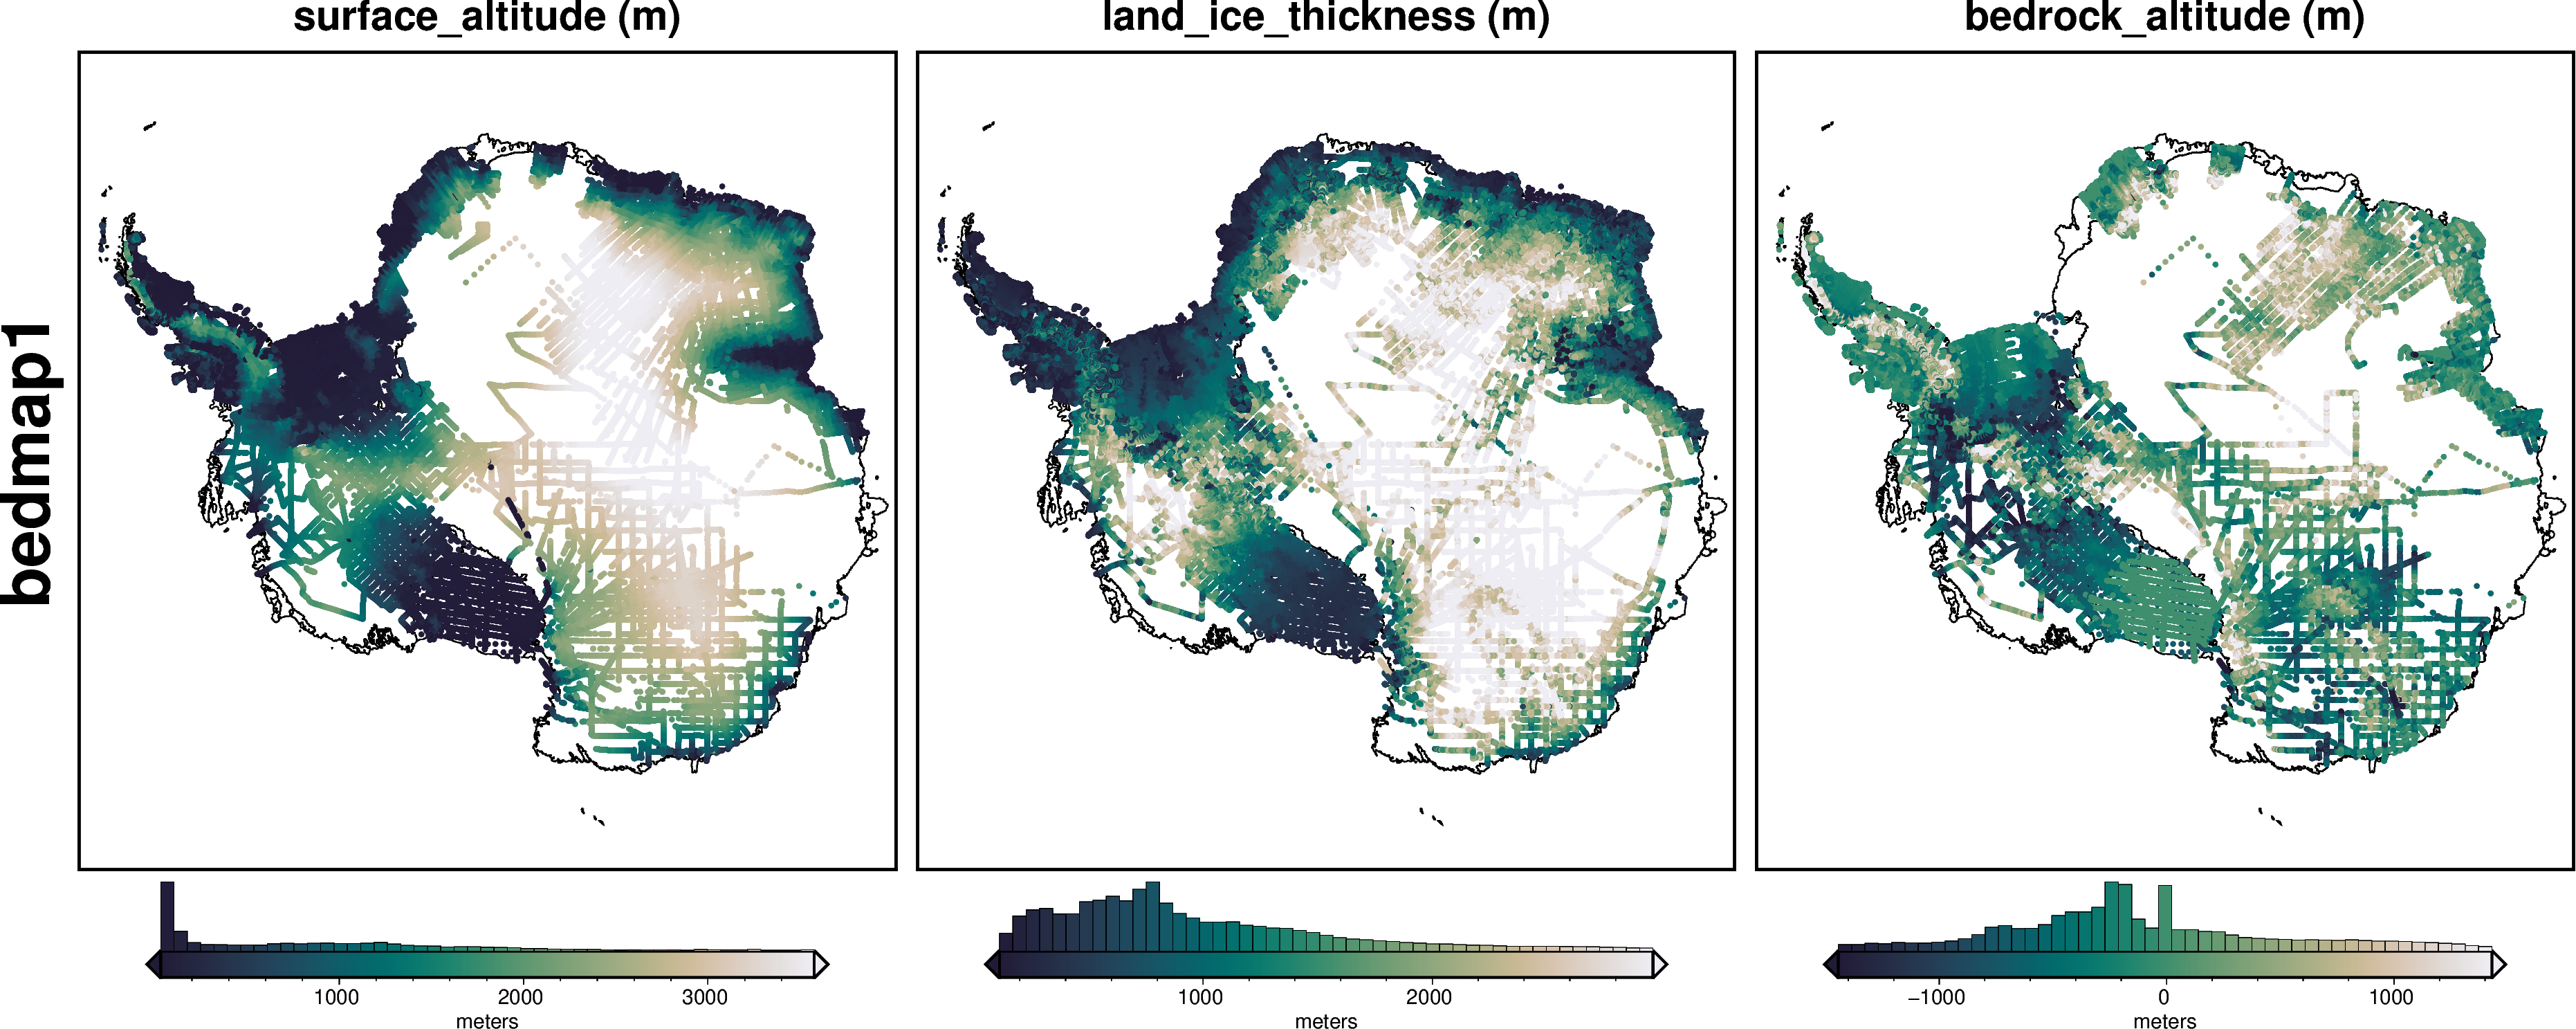

In [4]:
region = regions.antarctica

for row, (version, df) in enumerate(zip(version_names, dfs)):
    for col, data_str in enumerate(data_to_plot[row]):
        if (col == 0) and (row == 0):
            origin_shift = "initialize"
            fig = None
            xshift_amount = 1
            yshift_amount = -1
        elif col == 0:
            # shift left and down
            origin_shift = "both"
            xshift_amount = -1 * len(data_to_plot[row - 1]) + 1
            yshift_amount = -1.02
        else:
            origin_shift = "x"
            xshift_amount = 1
            yshift_amount = -1

        points = df.dropna(subset=data_str)
        fig = maps.basemap(
            fig=fig,
            origin_shift=origin_shift,
            xshift_amount=xshift_amount,
            yshift_amount=yshift_amount,
            region=region,
            coast=True,
            title=data_str,
            hemisphere="south",
            points=points,
            points_fill=points[data_str],
            points_cmap="rain",
            points_pen=None,
            points_style="c.1c",
            robust=True,
            colorbar=True,
            hist=True,
            reverse_cpt=True,
            cbar_label="meters",
        )
        if col == 0:
            fig.text(
                position="LM",
                justify="CM",
                offset="-1/0",
                angle=90,
                text=version,
                font="35p,Helvetica-Bold",
                no_clip=True,
            )

fig.show(dpi=200)